# Pymaceuticals Inc.
---

### Analysis

Number of Mice Tested:

Total number of mice involved in the study: 248
Study Duration (Timepoints):

Duration of the study: 45 timepoints
Number of Drugs Used:

Total number of different drugs tested: 10
Drug Names:

List of drugs tested: Capomulin, Ketapril, Naftisol, Infubinol, and others (total of 10 drugs)
Biggest Tumor (mm³) and Mouse ID:

Largest observed tumor volume: 78.57 mm³
Mouse ID with the largest tumor: o331
Smallest Tumor (mm³) and Mouse ID:

Smallest observed tumor volume: 22.05 mm³
Mouse ID with the smallest tumor: k403
Mean Tumor Volume (mm³):

Average tumor volume across all mice: 50.44 mm³
Median Tumor Volume (mm³):

Median tumor volume across all mice: 48.93 mm³
Tumor Volume Standard Deviation (mm³):

Standard deviation of tumor volumes: 8.91 mm³
Tumor Volume Variance (mm³):

Variance of tumor volumes: 79.46 mm³

The study involved 248 mice over 45 timepoints to evaluate the efficacy of 10 different drug regimens, including Capomulin, Ketapril, Naftisol, and Infubinol. The largest tumor observed was 78.57 mm³ in Mouse ID o331, while the smallest was 22.05 mm³ in Mouse ID k403. On average, tumors were measured at 50.44 mm³, with moderate variability (standard deviation of 8.91 mm³) and a variance of 79.46 mm³ across the cohort. These results provide valuable insights into the varied responses to treatment and guide future efforts in optimizing therapeutic outcomes.
 

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata,on='Mouse ID', how='left')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [171]:
# Checking the number of mice.
mouse_counts=combined_data["Mouse ID"].nunique()
mouse_counts


249

In [172]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicate_mice=duplicate_mice['Mouse ID'].unique()
unique_duplicate_mice

array(['g989'], dtype=object)

In [173]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_data[~combined_data['Mouse ID'].isin(unique_duplicate_mice)]
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [175]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_counts=clean_dataframe["Mouse ID"].nunique()
clean_mouse_counts


248

## Summary Statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_values = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_values = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_values = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation_values = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_values = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_values,
    'Median Tumor Volume': median_values,
    'Tumor Volume Variance': variance_values,
    'Tumor Volume Std. Dev.': std_deviation_values,
    'Tumor Volume Std. Err.': sem_values
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [177]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df = pd.DataFrame(summary)

summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

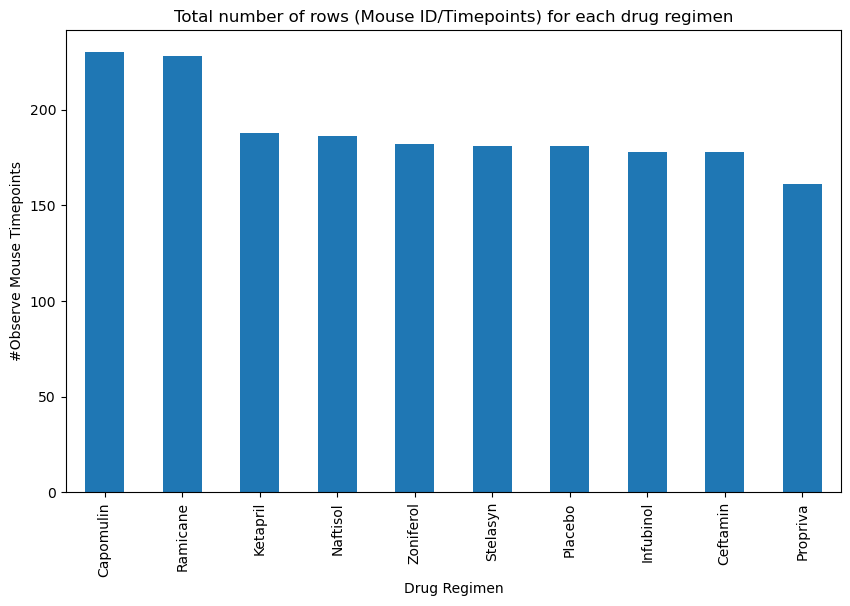

In [178]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_value=combined_data['Drug Regimen'].value_counts()
bar_value.plot(kind='bar' , figsize=(10,6))
plt.title('Total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('#Observe Mouse Timepoints')
plt.show()



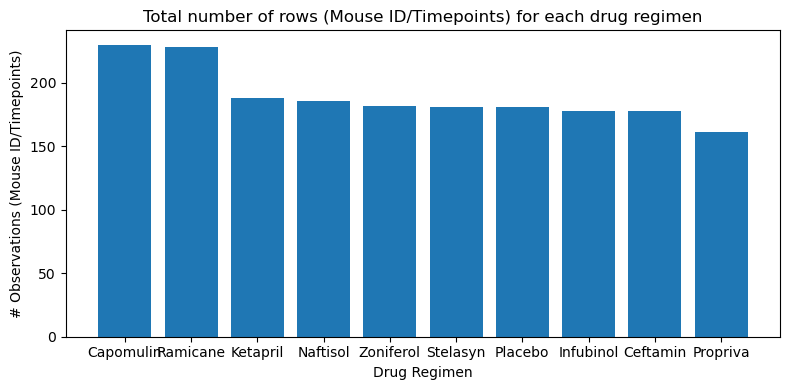

In [179]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,4))
plt.bar(bar_value.index, bar_value.values)

plt.title('Total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# Observations (Mouse ID/Timepoints)')

plt.tight_layout()
plt.show()

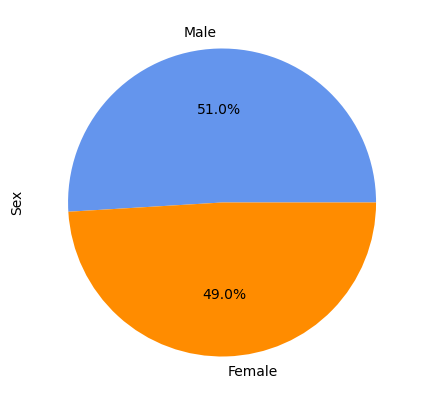

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_dataframe ['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, figsize=(5,5), colors=['cornflowerblue','darkorange'])
plt.ylabel('Sex')
plt.show()



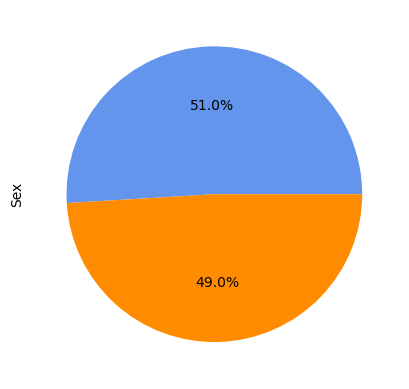

<Figure size 500x500 with 0 Axes>

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_dataframe['Sex'].value_counts()
plt.pie(sex_counts, autopct='%1.1f%%', startangle=360, colors=['cornflowerblue', 'darkorange'])
plt.ylabel('Sex')
plt.figure(figsize=(5, 5))
plt.show()


## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_data = clean_dataframe[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = filtered_data.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = final_tumor_volume.merge(filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

C:\Users\61433\AppData\Local\Temp\ipykernel_26684\450041603.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = clean_dataframe[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dictionary to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and determine potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    outliers_dict[treatment] = outliers
outliers_dict

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 15    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

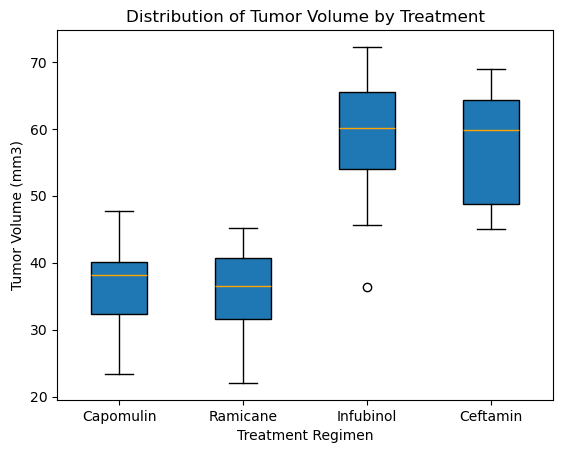

In [184]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, medianprops=dict(color='orange'))
plt.title('Distribution of Tumor Volume by Treatment')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

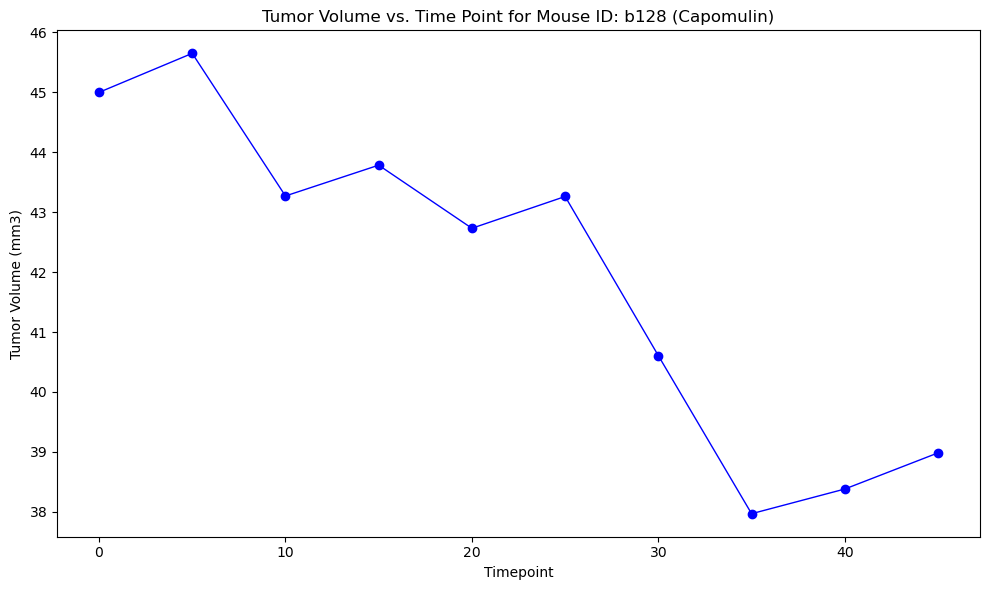

In [185]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

mouse_id = capomulin_data['Mouse ID'].iloc[0]

mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=1, markersize=6)

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()

# Show plot
plt.show()

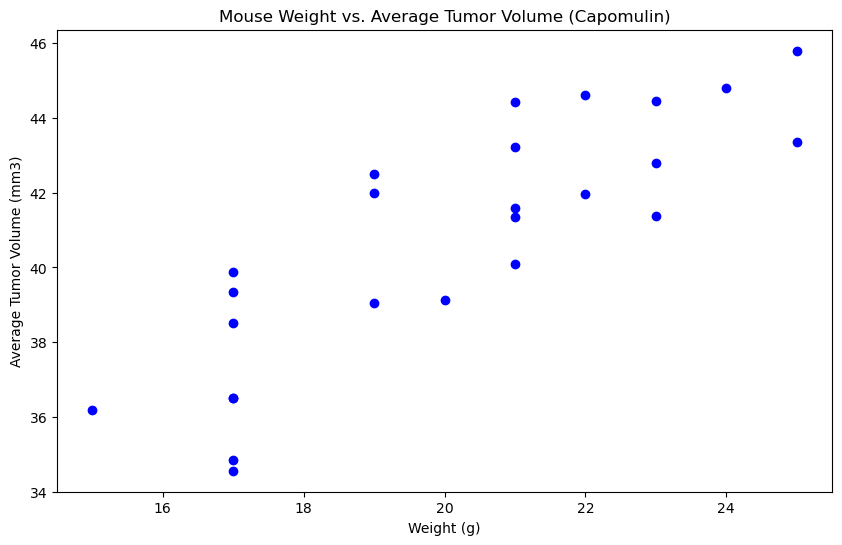

In [186]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()
capomulin_merged = pd.merge(average_tumor_volume_df, mouse_metadata, on='Mouse ID')

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'], marker='o', color='b')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

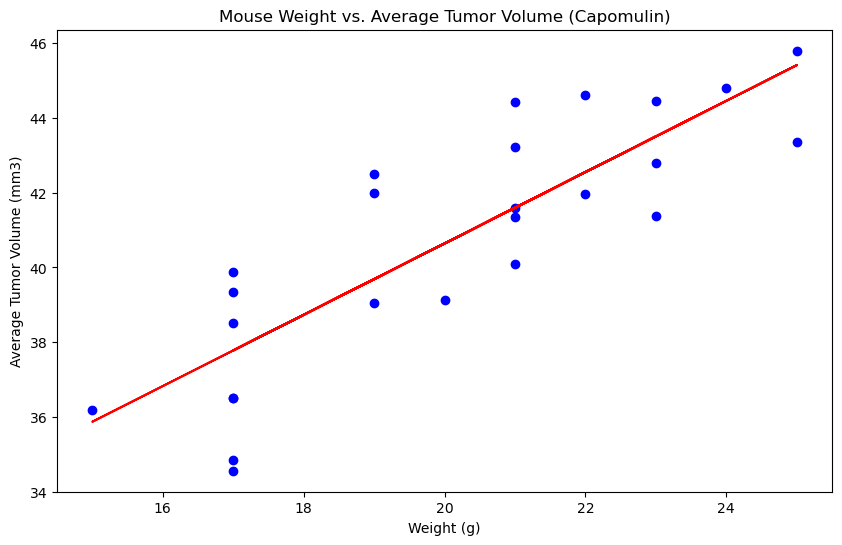

In [187]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()
capomulin_merged = pd.merge(average_tumor_volume_df, mouse_metadata, on='Mouse ID')
correlation = capomulin_merged['Weight (g)'].corr(capomulin_merged['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'], marker='o', color='b', label='Data Points')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'])
plt.plot(capomulin_merged['Weight (g)'], slope * capomulin_merged['Weight (g)'] + intercept, color='r', label='Regression Line')

plt.show()